# Implementation and modification of 2022 Ig Novel prize for economics
- Title: Talent vs Luck: the role of randomness in success and failure
- Authors: A. Pluchino∗ , A. E. Biondo† , A. Rapisarda‡
- Paper link: https://arxiv.org/pdf/1802.07068.pdf

## Basic settings

In [1]:
import tqdm 
import numpy as np
from matplotlib import pyplot as plt

# define experiment constants
N = 1000 # number of people
N_E = 500 # number of luck/unkuck event
starting_capital = 10

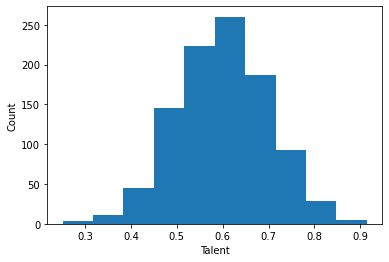

In [2]:
# define talents
talents = np.random.normal(0.6, 0.1, N)
talents[talents>0.99] = 0.99
talents[talents<0.01] = 0.01
plt.hist(talents)
plt.xlabel('Talent')
plt.ylabel('Count')
plt.show()

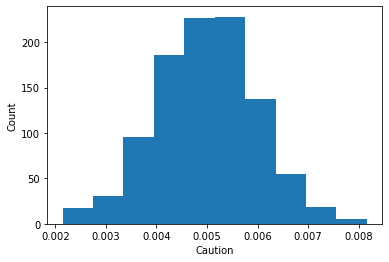

In [3]:
# define cautions: Higher caution keeps individual from unlucky events
cautions = np.random.normal(0.005, 0.001, N)
cautions[cautions<0.001] = 0.001
cautions[cautions>0.009] = 0.009

plt.hist(cautions)
plt.xlabel('Caution')
plt.ylabel('Count')
plt.show()

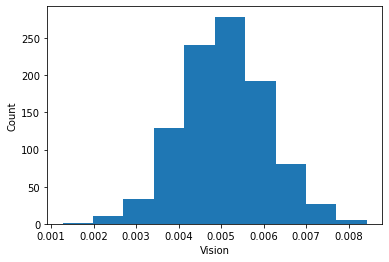

In [4]:
# define vision: Better vision allows individual to expose to more lucky events
visions = np.random.normal(0.005, 0.001, N)
visions[visions<0.001] = 0.001
visions[visions>0.009] = 0.009

plt.hist(visions)
plt.xlabel('Vision')
plt.ylabel('Count')
plt.show()

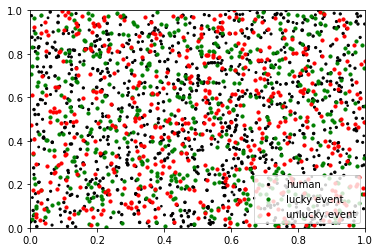

In [5]:
# define positions and starting capitals
positions = np.random.random((N, 2))
capitals = np.ones(N) * starting_capital

# make the concept image of this simulation
lucks, unlucks = np.random.random((N_E, 2)), np.random.random((N_E, 2))
plt.scatter(positions[:, 0],positions[:, 1], s=visions*1000, c = 'black', label = 'human')
plt.scatter(lucks[:, 0],lucks[:, 1], s=10, c = 'green', label = 'lucky event')
plt.scatter(unlucks[:, 0],unlucks[:, 1], s=10, c = 'red', label = 'unlucky event')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc=4)
plt.show()

## Experiments

In [6]:
n_simulation = 6
n_iteration = 80
   
def meet_events(x, events, meet_dist=0.005):
    meet_range = ()
    for event in events:
#         if np.square(x[0]-event[0]) + np.square(x[1]-event[1]) < np.square(meet_dist): # euclidean distance
        if x[0]-meet_dist<=event[0]<=x[0]+meet_dist and x[1]-meet_dist<=event[1]<=x[1]+meet_dist: # estimation (10 times faster)
            return True
    return False

100%|███████████████████████████████████████████| 80/80 [00:36<00:00,  2.20it/s]


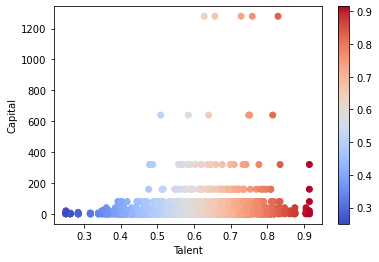

In [7]:
# Scenario 1: Different talents
for n in range(n_simulation):
    simulated_capitals = capitals.copy()
    for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
        seizeluck = np.random.random(N)
        lucks, unlucks = np.random.random((N_E, 2)), np.random.random((N_E, 2))    
        for i, (p, s, t) in enumerate(zip(positions, seizeluck, talents)):
            if meet_events(p, unlucks):
                simulated_capitals[i] /= 2
            elif meet_events(p, lucks) and s < t:
                simulated_capitals[i] *= 2
    plt.scatter(talents, simulated_capitals, c=talents, cmap = 'coolwarm')
    
plt.xlabel('Talent')
plt.ylabel('Capital')
plt.colorbar()
plt.show()

100%|███████████████████████████████████████████| 80/80 [00:33<00:00,  2.42it/s]


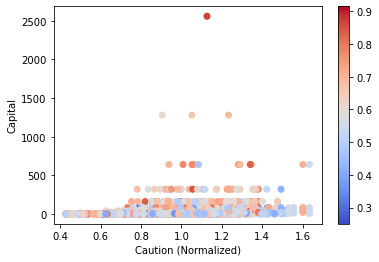

In [8]:
# Scenario 2: Different talent and incaution
for n in range(n_simulation):
    simulated_capitals = capitals.copy()
    for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
        seizeluck = np.random.random(N)
        lucks, unlucks = np.random.random((N_E, 2)), np.random.random((N_E, 2))    
        for i, (p, s, t, c) in enumerate(zip(positions, seizeluck, talents, cautions)):
            if meet_events(p, unlucks, 2*0.005-c):
                simulated_capitals[i] /= 2
            elif meet_events(p, lucks) and s < t:
                simulated_capitals[i] *= 2
    plt.scatter(cautions/0.005, simulated_capitals, c=talents, cmap = 'coolwarm')
    
plt.xlabel('Caution (Normalized)')
plt.ylabel('Capital')
plt.colorbar()
plt.show()

100%|███████████████████████████████████████████| 80/80 [00:33<00:00,  2.37it/s]


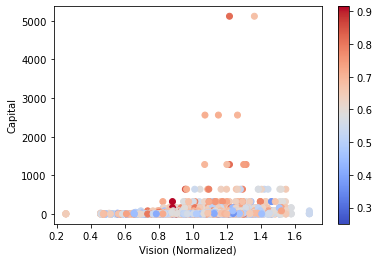

In [10]:
# Scenario 3: Different talent and vision
for n in range(n_simulation):
    simulated_capitals = capitals.copy()
    for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
        seizeluck = np.random.random(N)
        lucks, unlucks = np.random.random((N_E, 2)), np.random.random((N_E, 2))       
        for i, (p, s, t, v) in enumerate(zip(positions, seizeluck, talents, visions)):
            if meet_events(p, unlucks):
                simulated_capitals[i] /= 2
            elif meet_events(p, lucks, v) and s < t:
                simulated_capitals[i] *= 2
    plt.scatter(visions/0.005, simulated_capitals, c=talents, cmap = 'coolwarm')
    
plt.xlabel('Vision (Normalized)')
plt.ylabel('Capital')
plt.colorbar()
plt.show()

100%|███████████████████████████████████████████| 80/80 [00:33<00:00,  2.38it/s]


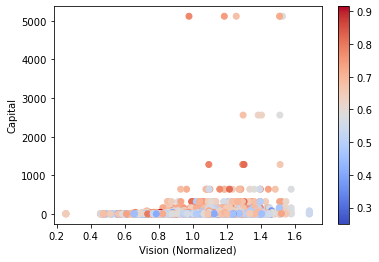

In [11]:
# Repeat Scenario 3: Different talent and vision
for n in range(n_simulation):
    simulated_capitals = capitals.copy()
    for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
        seizeluck = np.random.random(N)
        lucks, unlucks = np.random.random((N_E, 2)), np.random.random((N_E, 2))       
        for i, (p, s, t, v) in enumerate(zip(positions, seizeluck, talents, visions)):
            if meet_events(p, unlucks):
                simulated_capitals[i] /= 2
            elif meet_events(p, lucks, v) and s < t:
                simulated_capitals[i] *= 2
    plt.scatter(visions/0.005, simulated_capitals, c=talents, cmap = 'coolwarm')
    
plt.xlabel('Vision (Normalized)')
plt.ylabel('Capital')
plt.colorbar()
plt.show()